In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import scipy
import copy

In [3]:
curvs = np.load('./Saves/N32_Farhang_curvs.npz')['curvs']

<Figure size 432x288 with 0 Axes>

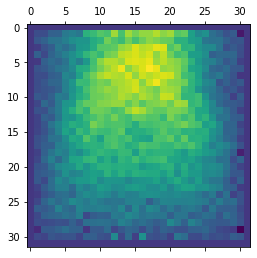

In [4]:
plt.figure()
plt.matshow(curvs[0])
plt.show()

In [12]:
def make_movie(img):
    ''' Makes a movie mp4 with the supplied frames in img
    img is a list of 2d arrays to be displayed using plt.imshow'''
    frames = [] # for storing the generated images
    fig = plt.figure()
    for i in range(len(img)):
        frames.append([plt.imshow(img[i])])

    ani = animation.ArtistAnimation(fig, frames, interval=200, blit=True,
                                    repeat_delay=1000)
    ani.save('avalanche.wav')
    plt.show()

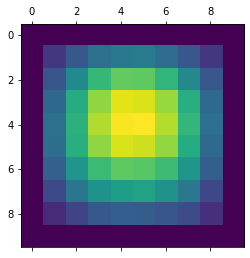

In [113]:
lat_B = np.load('/home/hlamarre/PycharmProjects/Avalanches/Saves/N10_Farhang.npz')['lat_B']

plt.matshow(lat_B)

In [114]:
def curvature(lattice):
    curv = np.zeros((10,10))  # curvature of the lattice initialization
    curv[1:-1, 1:-1] = lattice[1:-1, 1:-1] - 1 / 4 * (lattice[1:-1, 0:-2] + lattice[1:-1, 2:] +
                                lattice[0:-2, 1:-1] + lattice[2:, 1:-1])  # curvature computation
    return curv

In [199]:
def current(lattice, i, j):
    """ Computes the electric current J at a lattice point i,j """
    if i == 0:  # These conditions check if the point we are looking is near an edge
        a = 0
    else:
        a = lattice[i - 1, j]
    if i == 9:
        b = 0
    else:
        b = lattice[i+1, j]
    if j == 0:
        c = 0
    else:
        c = lattice[i, j-1]
    if j == 9:
        d = 0
    else:
        d = lattice[i, j+1]
    return 4*lattice[i, j] - a - b - c - d  # Computes the current using a derivative approximation
def opt_x(x, Zc, r1, r2, r3, theta):
    """ Function that defines x, the optimization parameter. Is used in root finding. """
    a = r1 + r2 + r3
    return (Zc * (r1**2 + r2**2 + r3**2 - a * x) - 5 / 32 * a * theta) / (5 / 32 * theta + a * Zc) - x
def opt_x2(x, Zc, r1, r2, r3, theta):
    """ Function that defines x, the optimization parameter. Is used in root finding. """
    a = r1 + r2 + r3
    x = np.abs(x)
    return (Zc * (r1**2 + r2**2 + r3**2 - a * x) - 5 / 32 * a * theta) / (5 / 32 * theta + a * Zc) - x
def e_total(lattice):
    """ Returns the total energy of a specified lattice """
    return np.sum(1/2*np.multiply(lattice[1:-1, 1:-1],
                                  4*lattice[1:-1, 1:-1] - lattice[1:-1, :-2] -
                                  lattice[2:, 1:-1] - lattice[1:-1, 2:] - lattice[:-2, 1:-1]))
def energy_point(lat,i,j):
    J = 4*lat[i,j] - lat[i,j+1] - lat[i,j-1] - lat[i-1,j] - lat[i+1,j]
    return 1/2*lat[i,j]*J

In [204]:
i = 3
j = 4
[r1, r2, r3] = np.random.uniform(0, 1, size=(3, 1))  # Stochastic redistribution
a = r1 + r2 + r3
# Theta is used in finding x that minimizes lattice energy
theta = r1 * (-2 * current(lat_B, i, j - 1) + 3 * lat_B[i, j - 1]) + \
        r2 * (-2 * current(lat_B, i + 1, j) + 3 * lat_B[i + 1, j]) + \
        r3 * (-2 * current(lat_B, i, j + 1) + 3 * lat_B[i, j + 1]) + \
        a * (2 * current(lat_B, i - 1, j) - 3 * lat_B[i - 1, j])
print(theta, r1, r2, r3)
Zc = 1
result = scipy.optimize.root(opt_x, 1, args=(Zc, r1, r2, r3, theta))['x']
result2 = scipy.optimize.root(opt_x2, 1, args=(Zc, r1, r2, r3, theta))['x']
result3 = scipy.optimize.minimize(opt_x, 1, args=(Zc, r1, r2, r3, theta))['x']
print(result, result2, result3)
# new_lat = copy.deepcopy(lat_B)
# new_lat[i, j] -= 4 / 5 * Zc
# new_lat[i, j - 1] += 4 / 5 * r1 / (x + a) * Zc
# new_lat[i, j + 1] += 4 / 5 * r3 / (x + a) * Zc
# new_lat[i - 1, j] += 4 / 5 * x / (x + a) * Zc
# new_lat[i + 1, j] += 4 / 5 * r2 / (x + a) * Zc

[25.48591386] [0.87938582] [0.5424373] [0.34925121]
[-0.77923189] [1.01255695e-05] [2.44571654e+11]


NameError: name 'lplt' is not defined

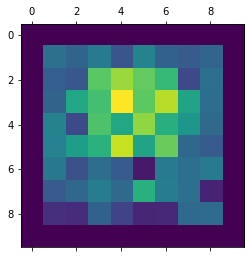

In [195]:
plt.matshow(curvature(lat_B))
plt.matshow(curvature(new_lat))

In [188]:
[r1, r2, r3] = np.random.uniform(0, 1, size=(3, 1))  # Stochastic redistribution
a = r1 + r2 + r3
#Theta is used in finding x that minimizes lattice energy
theta = r1 * (-2 * current(lat_B, i, j - 1) + 3 * lat_B[i, j - 1]) + \
        r2 * (-2 * current(lat_B, i + 1, j) + 3 * lat_B[i + 1, j]) + \
        r3 * (-2 * current(lat_B, i, j + 1) + 3 * lat_B[i, j + 1]) + \
        a * (2 * current(lat_B, i - 1, j) - 3 * lat_B[i - 1, j])
Zc = 1
result = scipy.optimize.root(opt_x, 1, args=(Zc, r1, r2, r3, theta))
x = result['x'][0]
print(result)
# print(opt_x(x, Zc, r1, r2, r3, theta))
# print(x)
new_lat = copy.deepcopy(lat_B)
new_lat[i, j] -= 4 / 5 * Zc
new_lat[i, j - 1] += 4 / 5 * r1 / (x+a) * Zc
new_lat[i, j + 1] += 4 / 5 * r3 / (x+a) * Zc
new_lat[i - 1, j] += 4 / 5 * x / (x+a) * Zc
new_lat[i + 1, j] += 4 / 5 * r2 / (x+a) * Zc
print(e_total(new_lat) - e_total(lat_B))

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([1.11022302e-16])
       r: array([1.30482211])
  status: 1
 success: True
       x: array([-0.84478633])
1.2992442872350694


In [133]:
print(curvature(lat_B), np.max(curvature(lat_B)))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.75029794 0.64681781 0.83364856 0.54007957 0.9107673
  0.63442618 0.58203688 0.66743208 0.        ]
 [0.         0.6086943  0.55483438 1.51925402 1.73372876 1.54893597
  1.362053   0.45286852 0.74166982 0.        ]
 [0.         0.6448411  1.21341783 1.42952085 2.03642232 1.52159867
  1.82013931 1.19319209 0.73664004 0.        ]
 [0.         0.90825416 0.45651978 1.46430376 1.21301397 1.6958242
  1.28541808 1.07704921 0.70506217 0.        ]
 [0.         0.90531578 1.12994674 1.29954654 1.86341104 1.1918167
  1.56421484 0.69038018 0.58291366 0.        ]
 [0.         0.82430659 0.50655168 0.72747633 0.58409898 0.14239233
  0.83791854 0.74542265 0.83633292 0.        ]
 [0.         0.58531023 0.67549603 0.85787949 0.70514364 1.29177148
  0.86202008 0.74381146 0.20586192 0.        ]
 [0.         0.28518585 0.26059833 0.63334536 0.41300922 0.21554965
  0.23219088 0.6996295 

In [101]:
np.sort(curvature(lat_B))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.54007957, 0.58203688, 0.63442618,
        0.64681781, 0.66743208, 0.75029794, 0.83364856, 0.9107673 ],
       [0.        , 0.        , 0.45286852, 0.55483438, 0.6086943 ,
        0.74166982, 1.362053  , 1.51925402, 1.54893597, 1.73372876],
       [0.        , 0.        , 0.6448411 , 0.73664004, 1.19319209,
        1.21341783, 1.42952085, 1.52159867, 1.82013931, 2.03642232],
       [0.        , 0.        , 0.45651978, 0.70506217, 0.90825416,
        1.07704921, 1.21301397, 1.28541808, 1.46430376, 1.6958242 ],
       [0.        , 0.        , 0.58291366, 0.69038018, 0.90531578,
        1.12994674, 1.1918167 , 1.29954654, 1.56421484, 1.86341104],
       [0.        , 0.        , 0.14239233, 0.50655168, 0.58409898,
        0.72747633, 0.74542265, 0.82430659, 0.83633292, 0.83791854],
       [0.        , 0.        , 0.2058619